In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [2]:
def ruin_probability(h: int, w: float, N: int) -> float:
    if w == 0.5:
        return 1 - (h / N)
    else:
        x = (1 - w) / w
        return (x**h - x**N) / (1 - x**N)

In [3]:
def min_h(threshold: float, w: float, N: int) -> int:
    for h in range(N + 1):
        if 1 - ruin_probability(h, w, N) >= threshold:
            return h

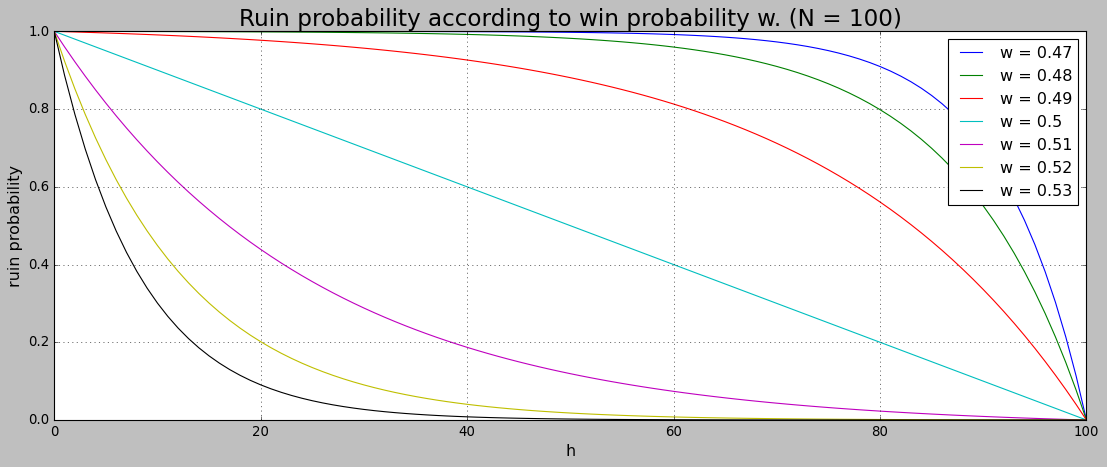

Min h to have a ruin probability less than 50%:
47%: 95
48%: 92
49%: 84
50%: 50
51%: 17
52%: 9
53%: 6


In [4]:
N = 100
h = np.arange(0, N + 1)
win_prob = (0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53)

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(14, 6), tight_layout=True)

for w in win_prob:
    ax.plot(h, ruin_probability(h, w, N), label=f"{w = }")
    
ax.set_xlabel("h", fontsize="large")
ax.set_ylabel("ruin probability", fontsize="large")
ax.legend(fontsize="large")
ax.set_title(f"Ruin probability according to win probability w. ({N = })", fontsize="xx-large")
ax.grid()
plt.show();

threshold = 0.5
print(f"Min h to have a ruin probability less than {threshold * 100:.0f}%:")

for w in win_prob:
    print(f"{w * 100:.0f}%: {min_h(threshold, w, N)}")

In [5]:
threshold = 0.5
print(f"Min h to have a ruin probability less than {threshold * 100:.0f}%:")

for w in win_prob:
    print(f"w = {w * 100:.0f}%: {min_h(threshold, w, N)}")

Min h to have a ruin probability less than 50%:
w = 47%: 95
w = 48%: 92
w = 49%: 84
w = 50%: 50
w = 51%: 17
w = 52%: 9
w = 53%: 6


## Roulette

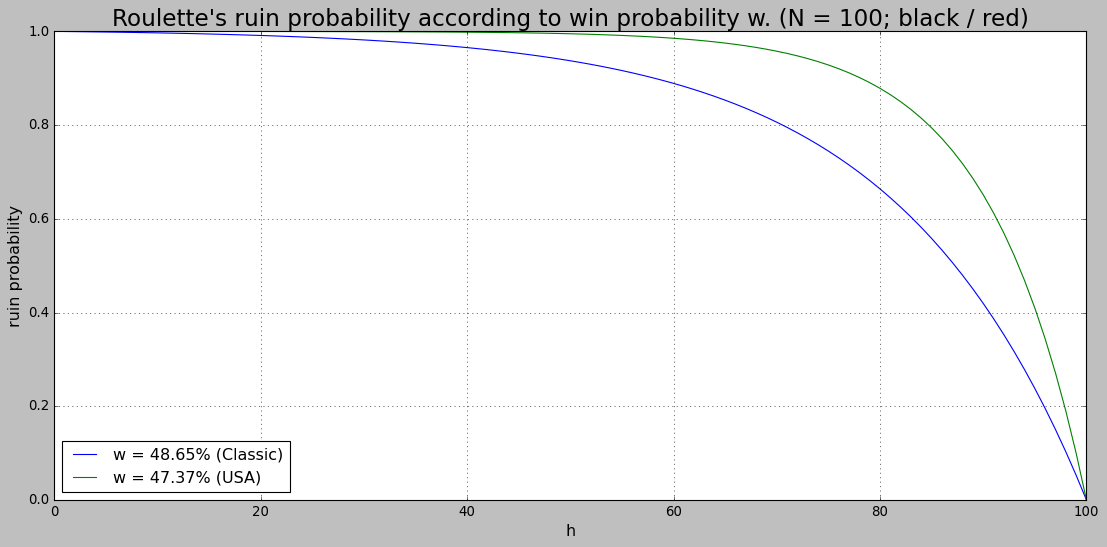

Min h to have a ruin probability less than 50%:
w = 48.65% (Classic): 88
w = 47.37% (USA): 94


In [14]:
w_classic = 18 / 37
w_usa = 18 / 38
N = 100
h = np.arange(0, N + 1)
win_prob = (w_classic, w_usa)

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(14, 7), tight_layout=True)

for w, label in zip(win_prob, ("Classic", "USA")):
    ax.plot(h, ruin_probability(h, w, N), label=f"w = {w * 100:.2f}% ({label})")
    
ax.set_xlabel("h", fontsize="large")
ax.set_ylabel("ruin probability", fontsize="large")
ax.legend(fontsize="large", loc="lower left")
ax.set_title(f"Roulette's ruin probability according to win probability w. ({N = }; black / red)", fontsize="xx-large")
ax.grid()
plt.show();

threshold = 0.5
print(f"Min h to have a ruin probability less than {threshold * 100:.0f}%:")

for w, label in zip(win_prob, ("Classic", "USA")):
    print(f"w = {w * 100:.2f}% ({label:^}): {min_h(threshold, w, N)}")

## Double strategy

In [54]:
def win(w: float = 18/37) -> bool:
    return np.random.random() < w

def double_strategy(starting_money: int, target: int, w: float = 18/37) -> (list, list):
    available_money = starting_money
    loss_counter = 0
    portfolio_history = [available_money]
    bet_history = [0]

    while target > available_money > 0:
        # Set the bet
        bet = min(available_money, 2**loss_counter)
        bet_history.append(bet)
        
        # Play
        if win(w):
            available_money += bet
            loss_counter = 0
        else:
            available_money -= bet
            loss_counter += 1
            
        portfolio_history.append(available_money)
    return portfolio_history, bet_history

In [98]:
STARTING_MONEY = 127
TARGET = 254
N_SIMULATIONS = 10
w = 18 / 37

In [99]:
results = {k: double_strategy(STARTING_MONEY, TARGET, w) for k in range(N_SIMULATIONS)}

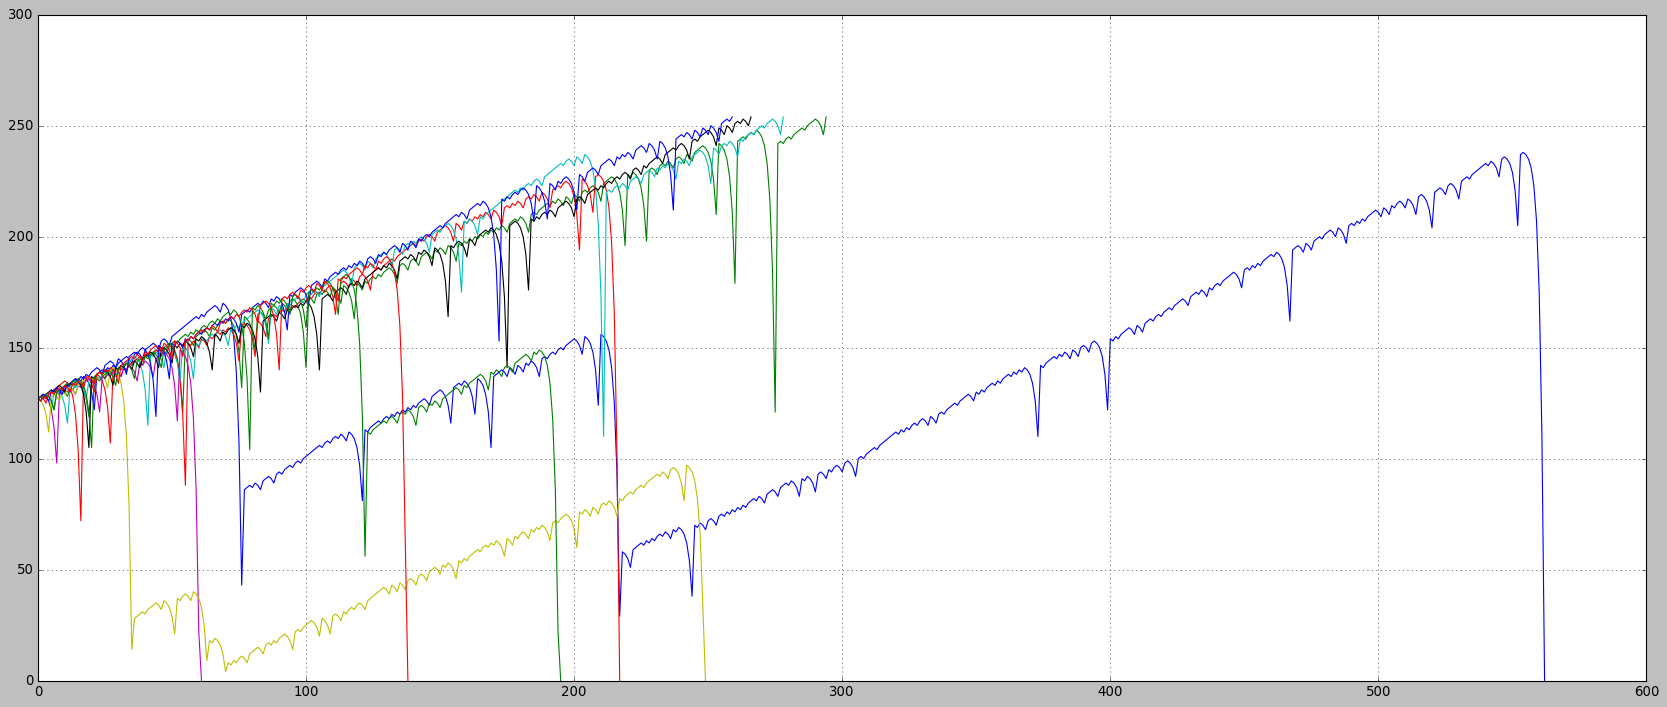

In [100]:
plt.style.use('classic')

fig, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

for k, v, in results.items():
    ax.plot(v[0], label=f"Sim {k}")
    
# ax.legend(fontsize="large")
ax.grid()
plt.show();

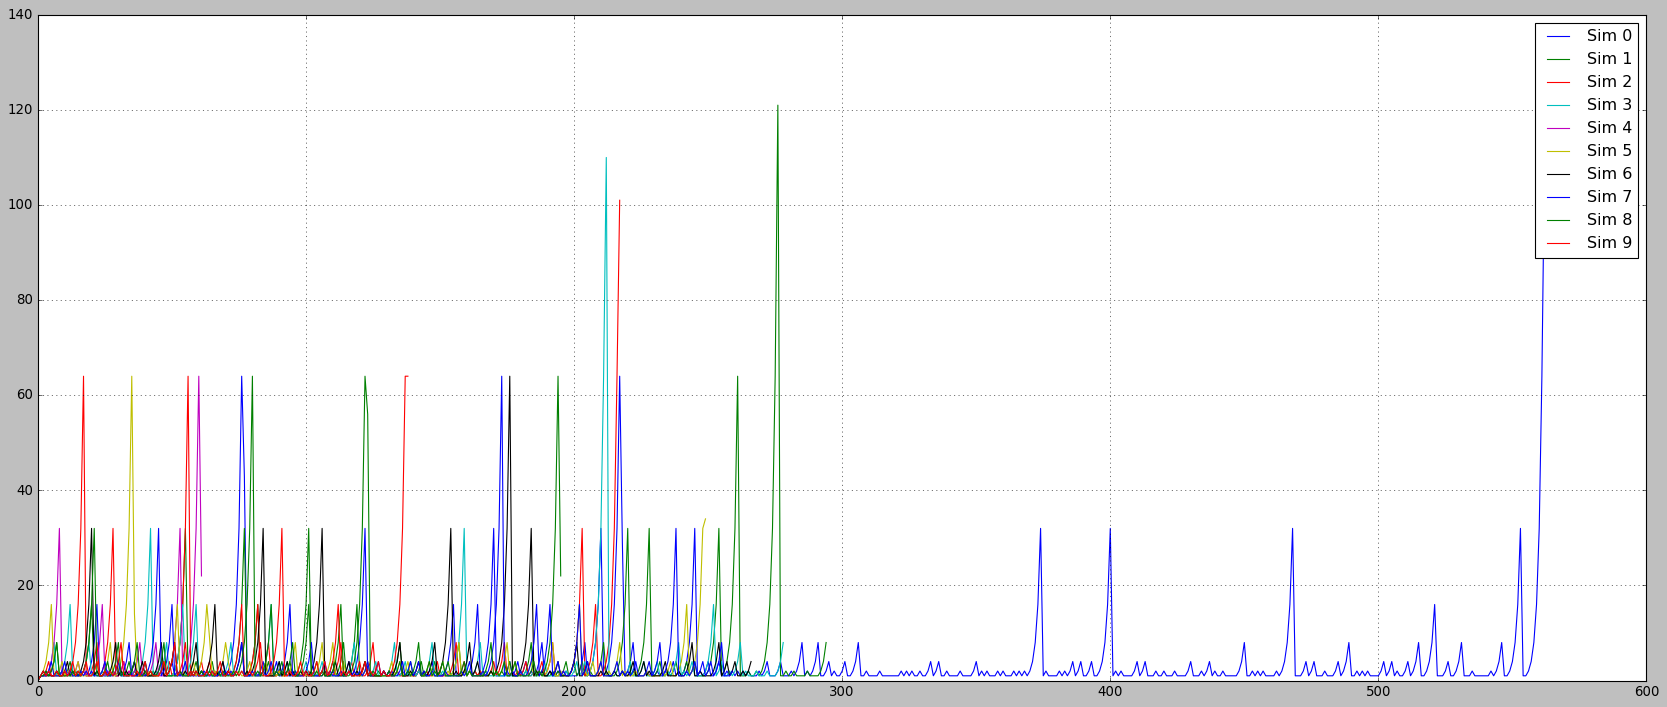

In [101]:
plt.style.use('classic')

fig, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

for k, v, in results.items():
    ax.plot(v[1], label=f"Sim {k}")
    
ax.legend(fontsize="large")
ax.grid()
plt.show();

In [102]:
for i in range(10):
    print(sum([2**j for j in range(i + 1)]))

1
3
7
15
31
63
127
255
511
1023
